In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
df=pd.read_csv("mpii_dataset.csv")

In [6]:
def imag(ix):
    img = df['NAME'][ix]
    print(img)
    im = Image.open('MPII/images/'+img )
    print(im.size)
    implot = plt.imshow(im)
    px=2
    while px <34:
        col = df.columns[px]
        x = df[col][ix]
        col = df.columns[px+1]
        y = df[col][ix]
        print(col,x,y)
        plt.scatter([[x]],[[y]])
        px=px+2

036981326.jpg
(640, 480)
r ankle_Y 488 431
r knee_Y 485 339
r hip_Y 486 250
l hip_Y 422 253
l knee_Y 446 336
l ankle_Y 452 432
pelvis_Y 454 252
thorax_Y 441 101
upper neck_Y 441.0426 97.8915
head top_Y 441.9574 31.1085
r wrist_Y 514 113
r elbow_Y 523 130
r shoulder_Y 477 82
l shoulder_Y 404 119
l elbow_Y 408 178
l wrist_Y 449 192


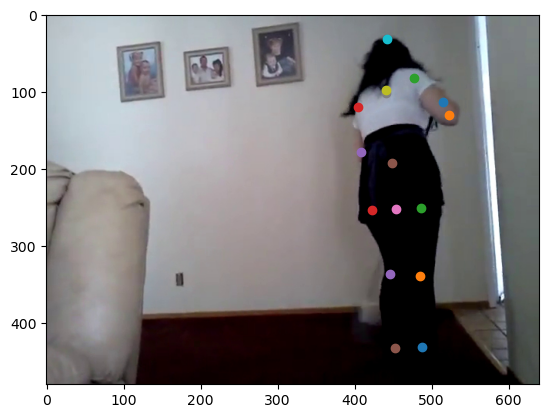

In [7]:
imag(1783)

In [8]:
def pix1(ix):
    img = df['NAME'][ix]
    print(img)
    im = Image.open('MPII/images/'+img )
    #implot=plt.imshow(im)
    #plt.show()
    im2=im.resize((224,224))
    implot = plt.imshow(im2)
    imsize=np.array(im.size)
    fact=imsize/224.0
    print(fact)
    px=2
    kx=ix
    while px <34:
        col = df.columns[px]
        x = df[col][ix]
        col = df.columns[px+1]
        y = df[col][ix]
        print(col,x,y)
        #plt.scatter([[x]],[[y]])
        px=px+2
    cx=2
    while cx<34:
        col=df.columns[cx]
        x=df[col][kx]/fact[0]
        col=df.columns[cx+1]
        y=df[col][kx]/fact[1]
        print(col,x,y)
        plt.scatter([[x]],[[y]])
        cx+=2
    plt.show()

In [9]:
import os
import cv2
import h5py
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
from PIL import Image
from pathlib import Path
from keras.models import Sequential,Model
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16,preprocess_input

from tensorflow.keras.utils import load_img,img_to_array
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Input,Flatten,SeparableConv2D,GlobalAveragePooling2D
from keras.layers import GlobalMaxPool2D
from keras import backend as K
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping,TensorBoard,ReduceLROnPlateau,CSVLogger,LearningRateScheduler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
color=sns.color_palette()
%matplotlib inline

In [12]:
def step_decay(epoch):
    initial_rate=0.1
    drop=0.5
    epochs_drop=5.0
    lrate=intia_rate*math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

In [13]:
train_data='MPII/images/'

In [14]:
data=pd.read_csv('mpii_dataset.csv')
data=data[:4000]
print(type(data['NAME'].values))
image_data=[]
labels=[]
data
print(data.shape[0])
print(data['NAME'].shape)

<class 'numpy.ndarray'>
4000
(4000,)


In [15]:
label_dict=dict((name,i) for i,name in enumerate(data['Category'].unique()))
name_dict=dict((i,name) for i,name in enumerate(data['Category'].unique()))
print(label_dict)
print(name_dict)

{'sports': 0, 'inactivity quiet/light': 1, 'miscellaneous': 2, 'occupation': 3, 'water activities': 4, 'home activities': 5, 'lawn and garden': 6, 'religious activities': 7, 'winter activities': 8, 'conditioning exercise': 9, 'bicycling': 10, 'fishing and hunting': 11, 'dancing': 12, 'walking': 13, 'running': 14, 'self care': 15, 'home repair': 16, 'music playing': 17, 'transportation': 18, 'volunteer activities': 19, '[]': 20}
{0: 'sports', 1: 'inactivity quiet/light', 2: 'miscellaneous', 3: 'occupation', 4: 'water activities', 5: 'home activities', 6: 'lawn and garden', 7: 'religious activities', 8: 'winter activities', 9: 'conditioning exercise', 10: 'bicycling', 11: 'fishing and hunting', 12: 'dancing', 13: 'walking', 14: 'running', 15: 'self care', 16: 'home repair', 17: 'music playing', 18: 'transportation', 19: 'volunteer activities', 20: '[]'}


In [21]:
import tqdm
for img_path in data['NAME'].values:
    img=load_img('MPII/images/'+img_path,target_size=(224,224))
    img_array=img_to_array(img)
    image_data.append(img_array)

In [22]:
image_data2=np.asarray(image_data)

In [24]:
y_train=data[data.columns[2:-3]]
print(y_train.columns)
print(y_train.shape)
y_train2=np.ones((y_train.shape))
print(y_train.shape)
for ix in range(data.shape[0]):
    img=df['NAME'][ix]
    im = Image.open('MPII/images/'+img )
    #implot=plt.imshow(im)
    #plt.show()
    im2=im.resize((224,224))
    #implot = plt.imshow(im2)
    imsize=np.array(im.size)
    fact=imsize/224.0
    cx=2
    while cx<34:
        col=df.columns[cx]
        x=df[col][ix]/fact[0]
        col=df.columns[cx+1]
        y=df[col][ix]/fact[1]
        #print(col,x,y)
        y_train2[ix][cx-2]=x
        y_train2[ix][cx-1]=y
        cx+=2

Index(['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y', 'r hip_X', 'r hip_Y',
       'l hip_X', 'l hip_Y', 'l knee_X', 'l knee_Y', 'l ankle_X', 'l ankle_Y',
       'pelvis_X', 'pelvis_Y', 'thorax_X', 'thorax_Y', 'upper neck_X',
       'upper neck_Y', 'head top_X', 'head top_Y', 'r wrist_X', 'r wrist_Y',
       'r elbow_X', 'r elbow_Y', 'r shoulder_X', 'r shoulder_Y',
       'l shoulder_X', 'l shoulder_Y', 'l elbow_X', 'l elbow_Y', 'l wrist_X',
       'l wrist_Y'],
      dtype='object')
(4000, 32)
(4000, 32)


In [25]:
from keras.applications.resnet50 import ResNet50
X=image_data2    #include_top=False,
base_model=ResNet50(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in base_model.layers[:-7]:
    layer.trainable=False
# for layer in base_model.layers:
#     print(layer,layer.trainable)
print(base_model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 3,415,552 (13.03 MB)

 Non-trainable params: 20,172,160 (76.95 MB)

None


In [26]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
# model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 3,415,552 (13.03 MB)

 Non-trainable params: 20,172,160 (76.95 MB)

In [32]:
checkpoint = ModelCheckpoint('./base.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='max',
                             save_weights_only=False)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0.001,
                          patience=30,
                          verbose=1,
                          mode='auto')

tensorboard = TensorBoard(
    log_dir='./logs',
    histogram_freq=0,
    write_graph=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename="training_csv.log",
    separator=",",
    append=False
)

lrsched = LearningRateScheduler(step_decay, verbose=1)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=5,
    verbose=1,
    mode='auto',
    min_delta=0.0001,
    cooldown=1,
    min_lr=0.0001
)

callbacks = [checkpoint, tensorboard, earlystop, csvlogger, reduce]


In [33]:
X.shape,y_train2.shape

((4000, 224, 224, 3), (4000, 32))

In [34]:
from keras.optimizers import Adam

In [36]:
opt=SGD(learning_rate=1e-5,momentum=0.95)
model.compile(loss='mean_absolute_error',
             optimizer=opt,metrics=['mean_absolute_error'])
hist=model.fit(X,y_train2,epochs=20,shuffle=True,batch_size=2,validation_split=0.1,callbacks=callbacks)

Epoch 1/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 63.7758 - mean_absolute_error: 63.7758
Epoch 1: val_loss improved from -inf to 33.66442, saving model to ./base.keras
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 121s 66ms/step - loss: 63.7677 - mean_absolute_error: 63.7677 - val_loss: 33.6644 - val_mean_absolute_error: 33.6644 - learning_rate: 1.0000e-05
Epoch 2/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 37.2705 - mean_absolute_error: 37.2705
Epoch 2: val_loss did not improve from 33.66442
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 119s 66ms/step - loss: 37.2701 - mean_absolute_error: 37.2701 - val_loss: 32.3501 - val_mean_absolute_error: 32.3501 - learning_rate: 1.0000e-05
Epoch 3/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 33.5515 - mean_absolute_error: 33.5515
Epoch 3: val_loss did not improve from 33.66442
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 120s 67ms/step - loss: 33.5513 - mean_absolute_error: 33.5513 - val_loss: 30.2701 - val_mean_absolute_error: 30.2701 - learning_rate: 1.

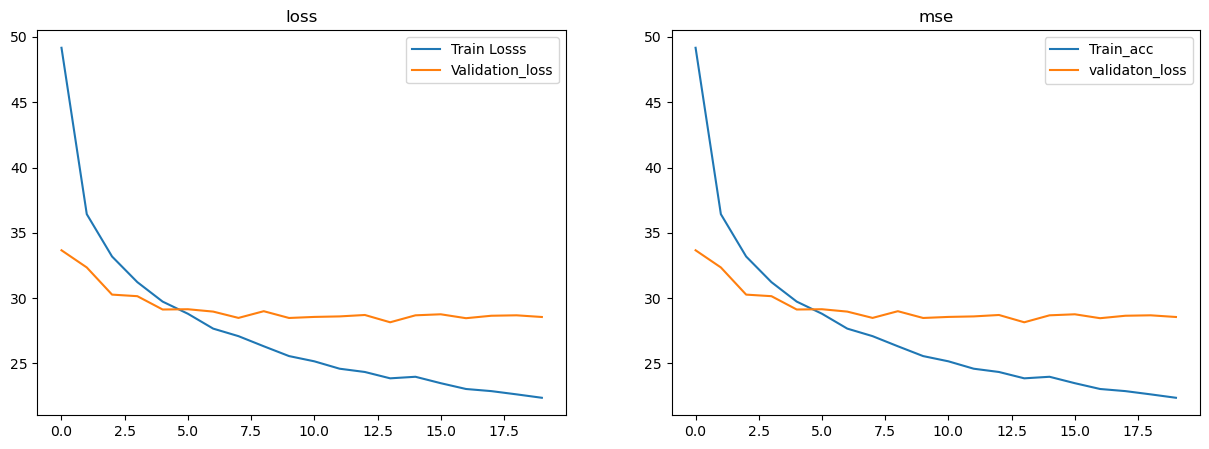

In [37]:
def show_final_history(history):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch,history.history['loss'],label="Train Losss")
    ax[0].plot(history.epoch,history.history["val_loss"],label="Validation_loss")
    ax[1].set_title('mse')
    ax[1].plot(history.epoch,history.history["mean_absolute_error"],label="Train_acc")
    ax[1].plot(history.epoch,history.history["val_mean_absolute_error"],label="validaton_loss")
    ax[0].legend()
    ax[1].legend()
show_final_history(hist)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
087737307.jpg
(224, 224, 3) (224, 224)
32


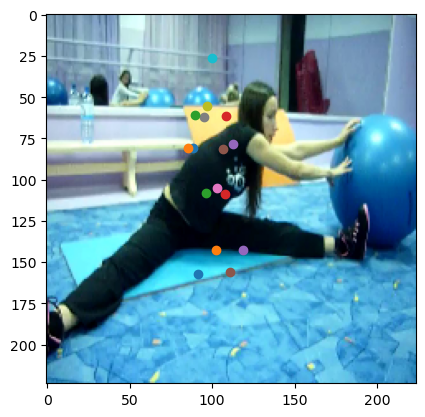

In [38]:
y_pred=model.predict(X[190:191])
n=191
img = df['NAME'][n]
print(img)
im = load_img('MPII/images/'+img,target_size=(224,224))
img = img_to_array(im)
img_ = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(img.shape,img_.shape)
points = y_pred[0]
print(len(points))
i=0
plt.imshow(im)
while i < 16:
    x = points[2*i]
    y = points[(2*i)+1]
    plt.scatter([[x]],[[y]])
    i=i+1